In [97]:
import pandas as pd
import json
import re

import seaborn as sns

from io import StringIO
from html.parser import HTMLParser

import numpy as np

import matplotlib.pyplot as plt

sns.set(style="whitegrid")

## **Assessing data**
Detect and document at least eight (8) quality issues and two (2) tidiness issues using visually and programmatically.

In [47]:
with open('tweet-json.txt') as json_f:
    json_tweet = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        json_tweet = json_tweet.append(data,ignore_index=True)

In [48]:
json_tweet.head()

tweet_id favorites retweets
0  892420643555336193     39467     8853
1  892177421306343426     33819     6514
2  891815181378084864     25461     4328
3  891689557279858688     42908     8964
4  891327558926688256     41048     9774

In [49]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   object
 2   retweets   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [50]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [51]:
tweet_archive.head(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   8.924206e+17                    NaN                  NaN   
1   8.921774e+17                    NaN                  NaN   
2   8.918152e+17                    NaN                  NaN   
3   8.916896e+17                    NaN                  NaN   
4   8.913276e+17                    NaN                  NaN   
5   8.910880e+17                    NaN                  NaN   
6   8.909719e+17                    NaN                  NaN   
7   8.907292e+17                    NaN                  NaN   
8   8.906092e+17                    NaN                  NaN   
9   8.902403e+17                    NaN                  NaN   
10  8.900066e+17                    NaN                  NaN   
11  8.898809e+17                    NaN                  NaN   
12  8.896654e+17                    NaN                  NaN   
13  8.896388e+17                    NaN                  NaN   
14  8.895311e+17                    NaN                  NaN   
15  8.892788e+17                    NaN                  NaN   
16  8.889172e+17                    NaN                  NaN   
17  8.888050e+17                    NaN                  NaN   
18  8.885550e+17                    NaN                  NaN   
19  8.882025e+17                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
0   This is Phineas. He's a mystical boy. Only eve...                  NaN   
1   This is Tilly. She's just checking pup on you....                  NaN   
2   This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3   This is Darla. She commenced a snooze mid meal...                  NaN   
4   This is Franklin. He would like you to stop ca...                  NaN   
5   Here we have a majestic great white breaching ...                  NaN   
6   Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7   When you watch your owner call another dog a g...                  NaN   
8   This is Zoey. She doesn't want to be one of th...                

In [52]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [53]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [54]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
# lets merge the data before performing data manipulations on them
tweet_archive_clean=tweet_archive.copy()
image_predictions_clean= image_predictions.copy()
json_tweet_clean= json_tweet.copy()

merged_tweet_data = pd.merge(tweet_archive_clean, json_tweet_clean, on = 'tweet_id', how = 'inner')
merged_tweet_data = pd.merge(merged_tweet_data, image_predictions_clean, on = 'tweet_id', how = 'inner')

In [71]:
merged_tweet_data.head(30)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   8.91815e+17                    NaN                  NaN   
1   8.90007e+17                    NaN                  NaN   
2   8.89639e+17                    NaN                  NaN   
3   8.89279e+17                    NaN                  NaN   
4   8.88917e+17                    NaN                  NaN   
5   8.88555e+17                    NaN                  NaN   
6   8.87705e+17                    NaN                  NaN   
7   8.87517e+17                    NaN                  NaN   
8   8.87343e+17                    NaN                  NaN   
9   8.87101e+17                    NaN                  NaN   
10  8.86983e+17                    NaN                  NaN   
11  8.86737e+17                    NaN                  NaN   
12  8.85985e+17                    NaN                  NaN   
13  8.85529e+17                    NaN                  NaN   
14  8.85312e+17                    NaN                  NaN   
15  8.85168e+17                    NaN                  NaN   
16  8.84442e+17                    NaN                  NaN   
17  8.83118e+17                    NaN                  NaN   
18  8.82992e+17                    NaN                  NaN   
19  8.82763e+17                    NaN                  NaN   
20  8.82627e+17                    NaN                  NaN   
21  8.82268e+17                    NaN                  NaN   
22  8.81667e+17                    NaN                  NaN   
23  8.80466e+17                    NaN                  NaN   
24  8.80221e+17                    NaN                  NaN   
25  8.79862e+17                    NaN                  NaN   
26  8.79492e+17                    NaN                  NaN   
27  8.79376e+17                    NaN                  NaN   
28  8.78058e+17                    NaN                  NaN   
29  8.77736e+17                    NaN                  NaN   

                    timestamp  \
0   2017-07-31 00:18:03 +0000   
1   2017-07-26 00:31:25 +0000   
2   2017-07-25 00:10:02 +0000   
3   2017-07-24 00:19:32 +0000   
4   2017-07-23 00:22:39 +0000   
5   2017-07-22 00:23:06 +0000   
6   2017-07-19 16:06:48 +0000   
7   2017-07-19 03:39:09 +0000   
8   2017-07-18 16:08:03 +0000   
9   2017-07-18 00:07:08 +0000   
10  2017-07-17 16:17:36 +0000   
11  2017-07-16 23:58:41 +0000   
12  2017-07-14 22:10:11 +0000   
13  2017-07-13 15:58:47 +0000   
14  2017-07-13 01:35:06 +0000   
15  2017-07-12 16:03:00 +0000   
16  2017-07-10 15:58:53 +0000   
17  2017-07-07 00:17:54 +0000   
18  2017-07-06 15:58:11 +0000   
19  2017-07-06 00:46:41 +0000   
20  2017-07-05 15:48:34 +0000   
21  2017-07-04 16:01:23 +0000   
22  2017-07-03 00:11:11 +0000   
23  2017-06-29 16:39:47 +0000   
24  2017-06-29 00:27:25 +0000   
25  2017-06-28 00:42:13 +0000   
26  2017-06-27 00:10:17 +0000   
27  2017-06-26 16:31:08 +0000   
28  2017-06-23 01:10:23 +0000   
29  2017-06-22 03:54:17 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17 

In [72]:
merged_tweet_data.name.sort_values()

#check for the names to find the incorrected ones
merged_tweet_data['name'].value_counts().head(40)

None        346
a            37
Oliver        8
Tucker        6
an            6
Bailey        6
Winston       6
Cooper        5
Penny         5
Toby          5
Sadie         5
Larry         4
Lucy          4
Clarence      4
Sophie        4
Lola          4
Ruby          3
Rusty         3
the           3
Gary          3
Scout         3
Louis         3
Sammy         3
Koda          3
Bella         3
Gus           3
Maggie        3
Jimothy       3
Daisy         3
Hank          3
Milo          3
Alfie         3
Cassie        3
Dexter        3
Oakley        3
Ellie         3
Django        2
Bisquick      2
Coops         2
Kenneth       2
Name: name, dtype: int64

In [73]:
merged_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158 entries, 0 to 1157
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1158 non-null   object 
 1   in_reply_to_status_id       14 non-null     float64
 2   in_reply_to_user_id         14 non-null     float64
 3   timestamp                   1158 non-null   object 
 4   source                      1158 non-null   object 
 5   text                        1158 non-null   object 
 6   retweeted_status_id         36 non-null     float64
 7   retweeted_status_user_id    36 non-null     float64
 8   retweeted_status_timestamp  36 non-null     object 
 9   expanded_urls               1158 non-null   object 
 10  rating_numerator            1158 non-null   int64  
 11  rating_denominator          1158 non-null   int64  
 12  name                        1158 non-null   object 
 13  doggo                       1158 

In [74]:
merged_tweet_data.jpg_url.sort_values()

#check for the names to find the incorrected ones
merged_tweet_data['jpg_url'].value_counts().head(40)

https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/Jle

In [75]:
merged_tweet_data.text[:40]

0     This is Archie. He is a rare Norwegian Pouncin...
1     This is Koda. He is a South Australian decksha...
2     This is Ted. He does his best. Sometimes that'...
3     This is Oliver. You're witnessing one of his m...
4     This is Jim. He found a fren. Taught him how t...
5     This is Ralphus. He's powering up. Attempting ...
6     This is Jeffrey. He has a monopoly on the pool...
7     I've yet to rate a Venezuelan Hover Wiener. Th...
8     You may not have known you needed to see this ...
9     This... is a Jubilant Antarctic House Bear. We...
10    This is Maya. She's very shy. Rarely leaves he...
11    This is Mingus. He's a wonderful father to his...
12    Viewer discretion advised. This is Jimbo. He w...
13    This is Maisey. She fell asleep mid-excavation...
14    RT @dog_rates: This is Lilly. She just paralle...
15    Here we have a corgi undercover as a malamute....
16    I present to you, Pup in Hat. Pup in Hat is gr...
17    Please only send dogs. We don't rate mecha

### Quality Issues

1. The data has timestamp column as a timestamp type which we would necessarily need as a datetime
2. The dog names have non names amongst it
3. the tweet text should be a string type not object
4. The tweet text has symbols in the text which are useless for textual analysis
5. retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are useless for analysis
6. unintuitive column name for prediction confidence, status and type
7. source is an html tag instead of links
8. retweets and favourites are useful as integers not object


### Tidying Issues

1. Remove entries that have dog values are false. These are not dogs of any kind
2. Remove duplicate jpg_url entries. this implies that they are same dog

## **Cleaning Data**

### Quality Issues


**The data has timestamp column as a timestamp type which we would necessarily need as a datetime**

In [76]:
merged_tweet_data['timestamp'] = pd.to_datetime(merged_tweet_data['timestamp'])
merged_tweet_data['timestamp'].dtype

datetime64[ns, UTC]

**The dog names have non names amongst it**

In [77]:
wrong_dog_names = ['a','the','an']
for i in wrong_dog_names:
          merged_tweet_data['name'].replace(i, 'None', inplace=True)

merged_tweet_data['name'].value_counts().head(40)

None        392
Oliver        8
Tucker        6
Winston       6
Bailey        6
Toby          5
Cooper        5
Penny         5
Sadie         5
Lucy          4
Sophie        4
Lola          4
Clarence      4
Larry         4
Milo          3
Alfie         3
Koda          3
Louis         3
Bella         3
Scout         3
Maggie        3
Oakley        3
Cassie        3
Ellie         3
Gary          3
Dexter        3
Sammy         3
Rusty         3
Jimothy       3
Hank          3
Ruby          3
Daisy         3
Gus           3
Jesse         2
Archie        2
Curtis        2
Sandy         2
Leo           2
Charles       2
Charlie       2
Name: name, dtype: int64

**the tweet text should be a string type not object**

In [78]:
merged_tweet_data["text"] = merged_tweet_data.text.astype("string")
merged_tweet_data["text"].dtype

StringDtype

**The tweet text has symbols in the text which are useless for textual analysis**

In [79]:
def character_remove(text):
    
    return re.sub(r'\W+', ' ', text)

In [80]:
merged_tweet_data['text'] = merged_tweet_data.text.apply(lambda row: character_remove(row))
merged_tweet_data.text[:40]

0     This is Archie He is a rare Norwegian Pouncing...
1     This is Koda He is a South Australian deckshar...
2     This is Ted He does his best Sometimes that s ...
3     This is Oliver You re witnessing one of his ma...
4     This is Jim He found a fren Taught him how to ...
5     This is Ralphus He s powering up Attempting ma...
6     This is Jeffrey He has a monopoly on the pool ...
7     I ve yet to rate a Venezuelan Hover Wiener Thi...
8     You may not have known you needed to see this ...
9     This is a Jubilant Antarctic House Bear We onl...
10    This is Maya She s very shy Rarely leaves her ...
11    This is Mingus He s a wonderful father to his ...
12    Viewer discretion advised This is Jimbo He wil...
13    This is Maisey She fell asleep mid excavation ...
14    RT dog_rates This is Lilly She just parallel b...
15    Here we have a corgi undercover as a malamute ...
16    I present to you Pup in Hat Pup in Hat is grea...
17    Please only send dogs We don t rate mechan

**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are useless for analysis**

In [81]:
merged_tweet_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**unintuitive column name for prediction confidence, status and type**

In [82]:
merged_tweet_data.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

**source is an html tag instead of links**

In [83]:
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [84]:
merged_tweet_data['source'] = merged_tweet_data.source.apply(lambda row: strip_tags(row))
merged_tweet_data["source"]

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
1153    Twitter for iPhone
1154    Twitter for iPhone
1155    Twitter for iPhone
1156    Twitter for iPhone
1157    Twitter for iPhone
Name: source, Length: 1158, dtype: object

**retweets and favourites are useful as integers not object**

In [85]:
merged_tweet_data["retweets"] = merged_tweet_data.retweets.astype(int)
print(merged_tweet_data["retweets"].dtype)
merged_tweet_data["favorites"] = merged_tweet_data.favorites.astype(int)
print(merged_tweet_data["favorites"].dtype)

int64
int64



### Tidying Issues

**Remove entries that have dog values are false. These are not dogs of any kind**

In [86]:
merged_tweet_data = merged_tweet_data[((merged_tweet_data['first_dog'] == True) & 
                  (merged_tweet_data['second_dog'] == True) & 
                  (merged_tweet_data['third_dog'] == True))]

**Remove duplicate jpg_url entries. this implies that they are same dog**

In [89]:
merged_tweet_data = merged_tweet_data.drop_duplicates(subset='jpg_url')
merged_tweet_data.jpg_url.sort_values()

#check for the names to find the incorrected ones
merged_tweet_data['jpg_url'].value_counts().head(40)

https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg    1
https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg    1
https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg    1
https://pbs.twimg.com/media/Czu9RiwVEAA_Okk.jpg    1
https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg    1
https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg    1
https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg    1
https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg    1
https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg    1
https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg    1
https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg    1
https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg    1
https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg    1
https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg    1
https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg    1
https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg    1
https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg    1
https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg    1
https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jp

In [90]:
merged_tweet_data.head(10)

tweet_id                 timestamp              source  \
0   8.91815e+17 2017-07-31 00:18:03+00:00  Twitter for iPhone   
1   8.90007e+17 2017-07-26 00:31:25+00:00  Twitter for iPhone   
2   8.89639e+17 2017-07-25 00:10:02+00:00  Twitter for iPhone   
3   8.89279e+17 2017-07-24 00:19:32+00:00  Twitter for iPhone   
4   8.88917e+17 2017-07-23 00:22:39+00:00  Twitter for iPhone   
5   8.88555e+17 2017-07-22 00:23:06+00:00  Twitter for iPhone   
6   8.87705e+17 2017-07-19 16:06:48+00:00  Twitter for iPhone   
9   8.87101e+17 2017-07-18 00:07:08+00:00  Twitter for iPhone   
11  8.86737e+17 2017-07-16 23:58:41+00:00  Twitter for iPhone   
12  8.85985e+17 2017-07-14 22:10:11+00:00  Twitter for iPhone   

                                                 text  \
0   This is Archie He is a rare Norwegian Pouncing...   
1   This is Koda He is a South Australian deckshar...   
2   This is Ted He does his best Sometimes that s ...   
3   This is Oliver You re witnessing one of his ma...   
4   This is Jim He found a fren Taught him how to ...   
5   This is Ralphus He s powering up Attempting ma...   
6   This is Jeffrey He has a monopoly on the pool ...   
9   This is a Jubilant Antarctic House Bear We onl...   
11  This is Mingus He s a wonderful father to his ...   
12  Viewer discretion advised This is Jimbo He wil...   

                                        expanded_urls  rating_numerator  \
0   https://twitter.com/dog_rates/status/891815181...                12   
1   https://twitter.com/dog_rates/status/890006608...                13   
2   https://twitter.com/dog_rates/status/889638837...                12   
3   https://twitter.com/dog_rates/status/889278841...                13   
4   https://twitter.com/dog_rates/status/888917238...                12   
5   https://twitter.com/dog_rates/status/888554962...                13   
6   https://twitter.com/dog_rates/status/887705289...                13   
9   https://twitter.com/dog_rates/status/887101392...                12   
11  https://www.gofundme.com/mingusneedsus,https:/...                13   
12  https://twitter.com/dog_rates/status/885984800...                12   

    rating_denominator     name doggo floofer  ... img_num  first_prediction  \
0                   10   Archie  None    None  ...       1         Chihuahua   
1                   10     Koda  None    None  ...       1           Samoyed   
2                   10      Ted  None    None  ...       1    French_bulldog   
3                   10   Oliver  None    None  ...       1           whippet   
4                   10      Jim  None    None  ...       1  golden_retriever   
5                   10  Ralphus  None    None  ...       3    Siberian_husky   
6                   10  Jeffrey  None    None  ...       1            basset   
9                   10     None  None    None  ...       1           Samoyed   
11                  10   Mingus  None    None  ...       1            kuvasz   
12                  10    Jimbo  None    None  ...       1  Blenheim_spaniel   

    first_confidence  first_dog second_prediction  second_confidence  \
0           0.716012       True          malamute           0.078253   
1           0.957979       True        Pomeranian           0.013884   
2           0.991650       True             boxer           0.002129   
3           0.626152       True            borzoi           0.194742   
4           0.714719       True   Tibetan_mastiff           0.120184   
5           0.700377       True        Eskimo_dog           0.166511   
6           0.821664       True           redbone           0.087582   
9           0.733942       True        Eskimo_dog           0.035029   
11          0.309706       True    Great_Pyrenees           0.186136   
12          0.972494       True          Shih-Tzu           0.006630   

   second_dog           third_prediction  third_confidence third_dog  
0        True                     kelpie          0.031379      True  
1        True        

## **Storing data**

In [91]:
merged_tweet_data.to_csv('twitter_archive_master.csv', 
                         index=False, encoding = 'utf-8')

## **Analyzing and Visualizing Data**

In [114]:
merged_tweet_data.describe()

rating_numerator  rating_denominator      favorites      retweets  \
count        696.000000          696.000000     696.000000    696.000000   
mean          11.538793           10.620690    7834.475575   2434.219828   
std            8.798214            7.847087   11176.488236   3906.538613   
min            1.000000            2.000000       0.000000     16.000000   
25%           10.000000           10.000000    1511.750000    546.750000   
50%           11.000000           10.000000    3624.000000   1270.500000   
75%           12.000000           10.000000    9630.500000   2972.500000   
max          165.000000          150.000000  107015.000000  56625.000000   

          img_num  first_confidence  second_confidence  third_confidence  
count  696.000000        696.000000         696.000000        696.000000  
mean     1.196839          0.624057           0.143623          0.061751  
std      0.565219          0.256922           0.104815          0.053266  
min      1.000000          0.044333           0.000068          0.000008  
25%      1.000000          0.412137           0.055699          0.015243  
50%      1.000000          0.629701           0.130439          0.048680  
75%      1.000000          0.854438           0.207850          0.095472  
max      4.000000          0.999885           0.467678          0.271042

In [115]:
merged_tweet_data.name.value_counts().nlargest(10)

None       208
Oliver       6
Cooper       5
Tucker       4
Sophie       4
Ellie        3
Penny        3
Koda         3
Jimothy      3
Winston      3
Name: name, dtype: int64

In [116]:
merged_tweet_data.name.value_counts().nsmallest(10)

Toffee        1
Lili          1
Rilo          1
Atlas         1
Pippa         1
Christoper    1
Cora          1
Suki          1
Mauve         1
Beau          1
Name: name, dtype: int64

### Frequency Distribution of Source

Twitter for iPhone    683
Twitter Web Client     10
TweetDeck               3
Name: source, dtype: int64


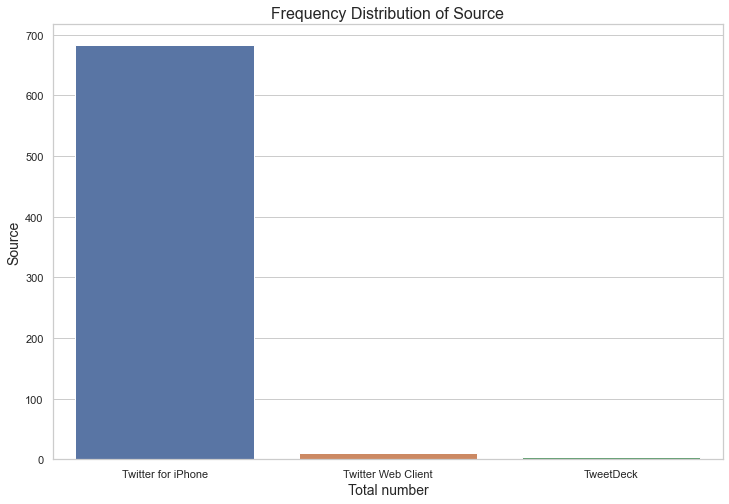

In [118]:
print(merged_tweet_data['source'].value_counts());

plt.figure(figsize=(12, 8))
sns.countplot(data = merged_tweet_data, x = 'source')
plt.xlabel('Total number', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('Frequency Distribution of Source',fontsize=16);

In [100]:
numeric_data = merged_tweet_data[["retweets", "favorites"]]

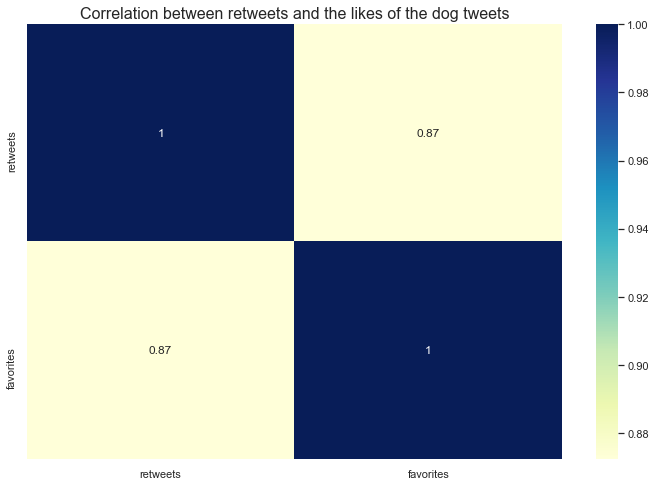

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True);
plt.title('Correlation between retweets and the likes of the dog tweets', fontsize=16);

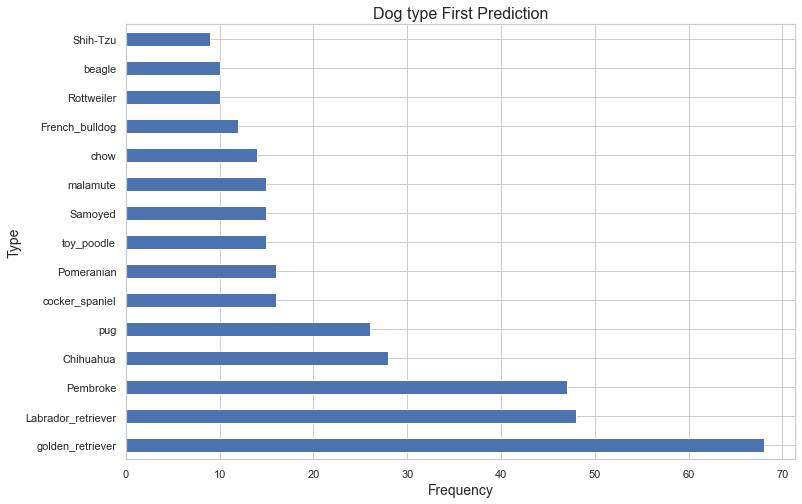

In [121]:
plt.figure(figsize=(12, 8))
merged_tweet_data['first_prediction'].value_counts().nlargest(15).plot(kind = 'barh');
plt.title('Dog type First Prediction', fontsize=16);
plt.xlabel('Frequency', fontsize=14);
plt.ylabel('Type', fontsize=14);

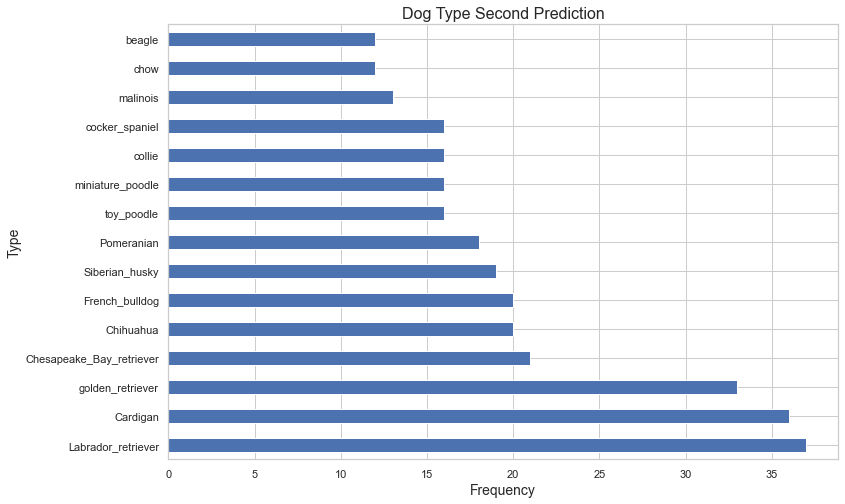

In [120]:
plt.figure(figsize=(12, 8))
merged_tweet_data['second_prediction'].value_counts().nlargest(15).plot(kind = 'barh');
plt.title('Dog Type Second Prediction', fontsize=16);
plt.xlabel('Frequency', fontsize=14);
plt.ylabel('Type', fontsize=14);

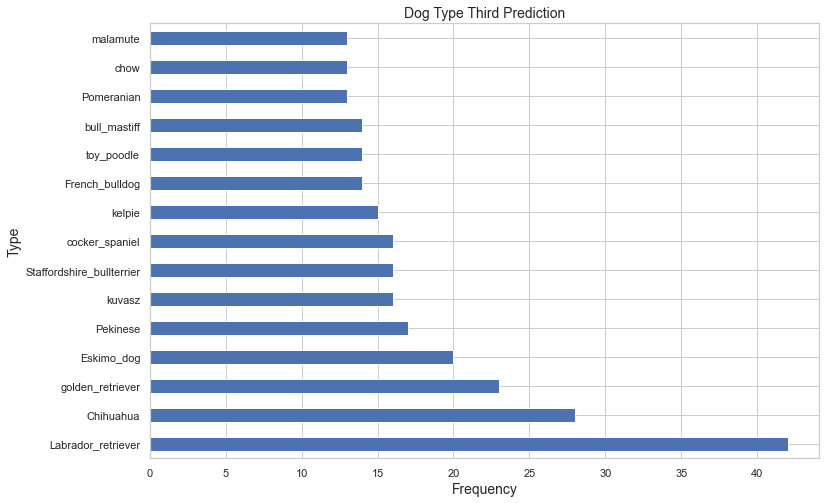

In [119]:
plt.figure(figsize=(12, 8))
merged_tweet_data['third_prediction'].value_counts().nlargest(15).plot(kind = 'barh');
plt.title('Dog Type Third Prediction', fontsize=14);
plt.xlabel('Frequency', fontsize=14);
plt.ylabel('Type', fontsize=14);